In [ ]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
# Import math Library
import math
import jax.numpy as jnp
from jax import jit,Array
from jax.typing import ArrayLike
import jax
jax.config.update("jax_enable_x64", True) # To improve precision of GPU computation

In [ ]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation:ArrayLike)->ArrayLike:
  activation = preactivation.clip(0.0)
  return activation

In [ ]:
# Define a shallow neural network
@jit
def shallow_nn(x:ArrayLike, beta_0:ArrayLike, omega_0:ArrayLike, beta_1:ArrayLike, omaga_1:ArrayLike):
    # Make sure that input data is (1 x n_data) array
    n_data = x.size
    x = jnp.reshape(x,(1,n_data))

    # This runs the network for ALL of the inputs, x at once so we can draw graph
    h1 = ReLU(jnp.matmul(beta_0,jnp.ones((1,n_data))) + jnp.matmul(omega_0,x))
    y = jnp.matmul(beta_1,jnp.ones((1,n_data))) + jnp.matmul(omega_1,h1)
    return y


In [ ]:
# Get parameters for model -- we can call this function to easily reset them
@jit
def get_parameters():
  # And we'll create a network that approximately fits it
  beta_0 = jnp.zeros((3,1));  # formerly theta_x0
  omega_0 = jnp.zeros((3,1)); # formerly theta_x1
  beta_1 = jnp.zeros((1,1));  # formerly phi_0# Get parameters for the model
  omega_1 = jnp.zeros((1,3)); # formerly phi_x


  beta_0=beta_0.at[0,0].set(0.3);
  beta_0=beta_0.at[1,0].set(-1.0);
  beta_0=beta_0.at[2,0].set(-0.5);
  omega_0= omega_0.at[0,0].set(-1.0);
  omega_0= omega_0.at[1,0].set(1.8);
  omega_0=omega_0.at[2,0].set(0.65)

  beta_1 = beta_1.at[0,0].set(0.1)

  omega_1= omega_1.at[0,0].set(-2.0);
  omega_1=omega_1.at[0,1].set(-1.0);
  omega_1=omega_1.at[0,2].set(7.0)

  return beta_0, omega_0, beta_1, omega_1

In [ ]:
# Utility function for plotting data
def plot_univariate_regression(x_model, y_model, x_data = None, y_data = None, sigma_model = None, title= None):
  # Make sure model data are 1D arrays
  x_model = jnp.squeeze(x_model)
  y_model = jnp.squeeze(y_model)

  fig, ax = plt.subplots()
  ax.plot(x_model,y_model)
  if sigma_model is not None:
    ax.fill_between(x_model, y_model-2*sigma_model, y_model+2*sigma_model, color='lightgray')
  ax.set_xlabel('Input, '); ax.set_ylabel('Output, ')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if title is not None:
    ax.set_title(title)
  if x_data is not None:
    ax.plot(x_data, y_data, 'ko')
  plt.show()


In [ ]:
x_train = jnp.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = jnp.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,\
                    0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444, \
                    0.248038840,0.26824970])

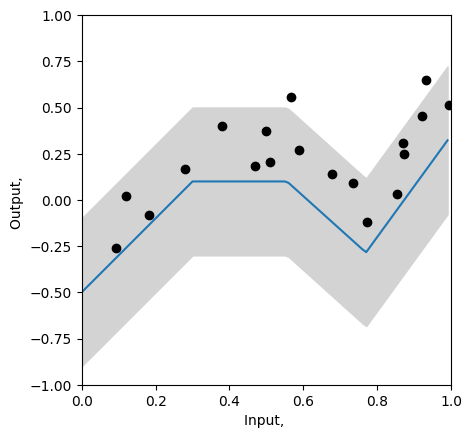

In [ ]:
# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2

# Define a range of input values
x_model = jnp.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma)



In [ ]:
# Return probability under normal distribution for input x
def normal_distribution(y, mu:float, sigma:float):
    # TODO-- write in the equation for the normal distribution
    # Equation 5.7 from the notes (you will need np.sqrt() and np.exp(), and math.pi)
    # Don't use the numpy version -- that's cheating!
    # Replace the line below
    # prob = np.zeros_like(y)
    prob = 1/jnp.sqrt(2*math.pi*sigma**2)*jnp.exp(-(y-mu)**2/(2*sigma**2) )
    return prob



In [ ]:
# Let's double check we get the right answer before proceeding
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.119,normal_distribution(1,-1,2.3)))


Correct answer = 0.119, Your answer = 0.119


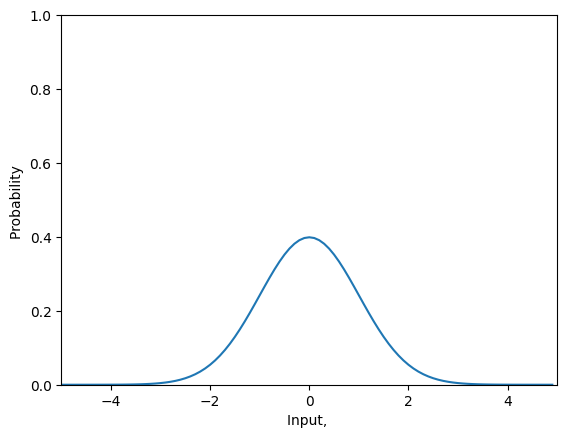

In [ ]:
# Let's plot the Gaussian distribution.
y_gauss = jnp.arange(-5,5,0.1)
mu = 0; sigma = 1.0
gauss_prob = normal_distribution(y_gauss, mu, sigma)
fig, ax = plt.subplots()
ax.plot(y_gauss, gauss_prob)
ax.set_xlabel('Input, '); ax.set_ylabel('Probability ')
ax.set_xlim([-5,5]);ax.set_ylim([0,1.0])
plt.show()

# TODO
# 1. Predict what will happen if we change to mu=1 and leave sigma=1
# Now change the code above and see if you were correct.

# 2. Predict what will happen if we leave mu = 0 and change sigma to 2.0

# 3. Predict what will happen if we leave mu = 0 and change sigma to 0.5


In [ ]:
# Return the likelihood of all of the data under the model
def compute_likelihood(y_train, mu, sigma):
  # TODO -- compute the likelihood of the data -- the product of the normal probabilities for each data point
  # Top line of equation 5.3 in the notes
  # You will need np.prod() and the normal_distribution function you used above
  # Replace the line below
  likelihood = jnp.prod(normal_distribution(y_train, mu, sigma))

  return likelihood


In [ ]:


# Let's test this for a homoscedastic (constant sigma) model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Set the standard deviation to something reasonable
sigma = 0.2
# Compute the likelihood
likelihood = compute_likelihood(y_train, mu_pred, sigma)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000010624,likelihood))


Correct answer = 0.000010624, Your answer = 0.000010624


In [ ]:
# Return the negative log likelihood of the data under the model
def compute_negative_log_likelihood(y_train, mu, sigma):
  # TODO -- compute the likelihood of the data -- don't use the likelihood function above -- compute the negative sum of the log probabilities
  # Bottom line of equation 5.3 in the notes
  # You will need np.sum(), np.log()
  # Replace the line below
  nll = -jnp.sum(jnp.log(normal_distribution(y_train, mu, sigma)))

  return nll

In [ ]:


# Let's test this for a homoscedastic (constant sigma) model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Set the standard deviation to something reasonable
sigma = 0.2
# Compute the log likelihood
nll = compute_negative_log_likelihood(y_train, mu_pred, sigma)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(11.452419564,nll))




Correct answer = 11.452419564, Your answer = 11.452419564


In [ ]:
# Return the squared distance between the predicted
def compute_sum_of_squares(y_train:ArrayLike, y_pred:ArrayLike)->float:
  # TODO -- compute the sum of squared distances between the training data and the model prediction
  # Eqn 5.10 in the notes.  Make sure that you understand this, and ask questions if you don't
  # Replace the line below
  sum_of_squares = jnp.sum((y_train-y_pred)**2);

  return sum_of_squares


In [ ]:
# Let's test this again
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Compute the log likelihood
sum_of_squares = compute_sum_of_squares(y_train, y_pred)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(2.020992572,sum_of_squares))




Correct answer = 2.020992572, Your answer = 2.020992572


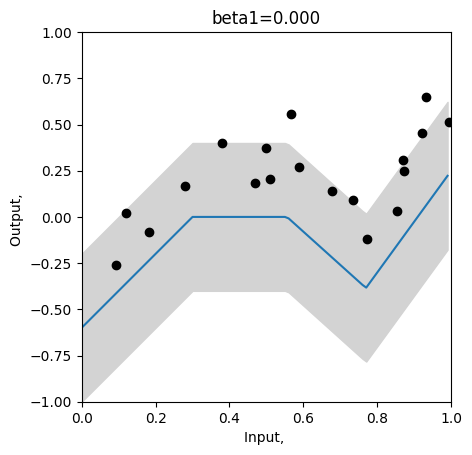

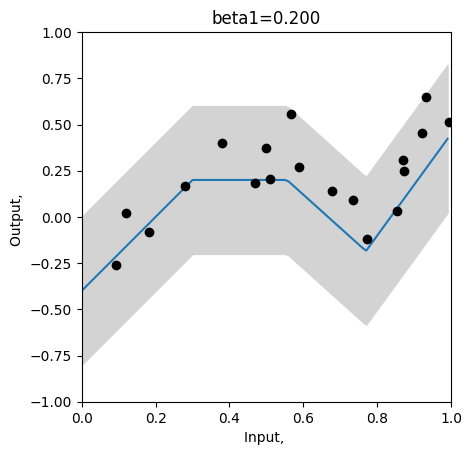

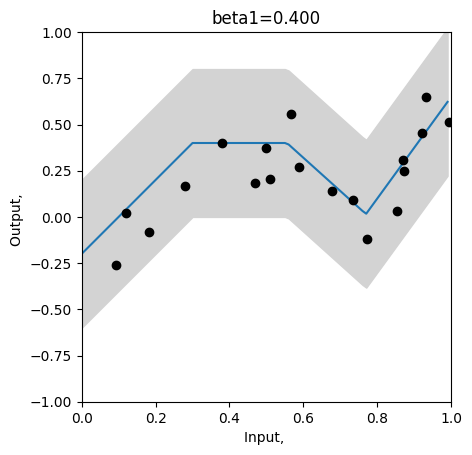

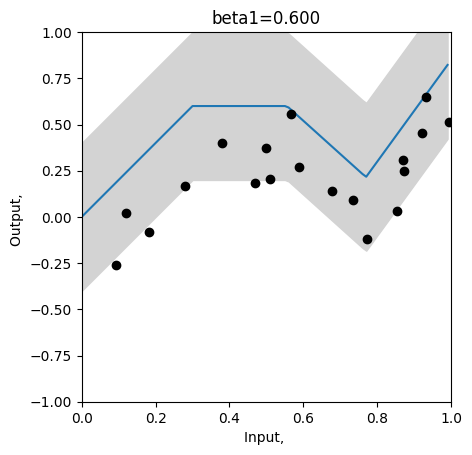

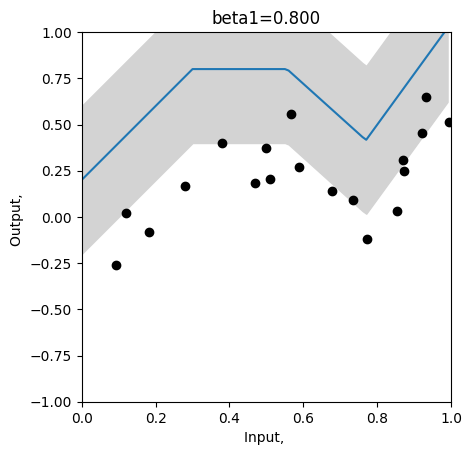

In [ ]:
# Define a range of values for the parameter
beta_1_vals = jnp.arange(0,1.0,0.01)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = jnp.zeros_like(beta_1_vals)
nlls = jnp.zeros_like(beta_1_vals)
sum_squares = jnp.zeros_like(beta_1_vals)

# Initialise the parameters# Define a range of values for the parameter
beta_1_vals = jnp.arange(0,1.0,0.01)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = jnp.zeros_like(beta_1_vals)
nlls = jnp.zeros_like(beta_1_vals)
sum_squares = jnp.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1= beta_1.at[0,0].set(beta_1_vals[count])
  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  # Compute and store the three values
  likelihoods=likelihoods.at[count].set(compute_likelihood(y_train, mu_pred, sigma))
  nlls=nlls.at[count].set(compute_negative_log_likelihood(y_train, mu_pred, sigma))
  sum_squares=sum_squares.at[count].set(compute_sum_of_squares(y_train, y_pred))
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))




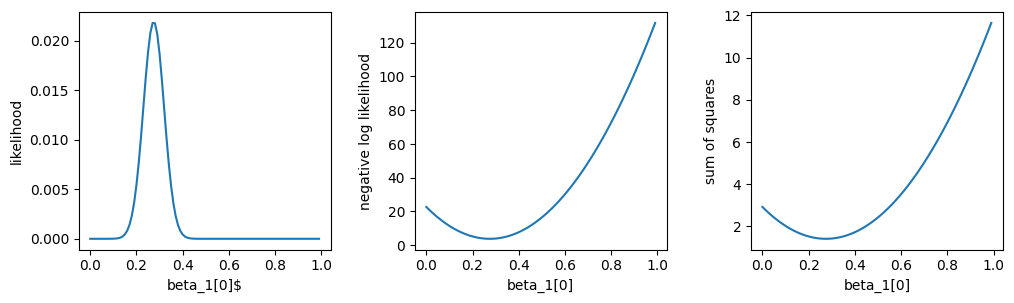

In [ ]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function the value of the offset beta1
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10.5, 3.5)
fig.tight_layout(pad=3.0)
ax[0].plot(beta_1_vals, likelihoods); ax[0].set_xlabel('beta_1[0]$'); ax[0].set_ylabel('likelihood')
ax[1].plot(beta_1_vals, nlls); ax[1].set_xlabel('beta_1[0]'); ax[1].set_ylabel('negative log likelihood')
ax[2].plot(beta_1_vals, sum_squares); ax[2].set_xlabel('beta_1[0]'); ax[2].set_ylabel('sum of squares')
plt.show()


Maximum likelihood = 0.022, at beta_1=0.270
Minimum negative log likelihood = 3.826, at beta_1=0.270
Least squares = 1.411, at beta_1=0.270


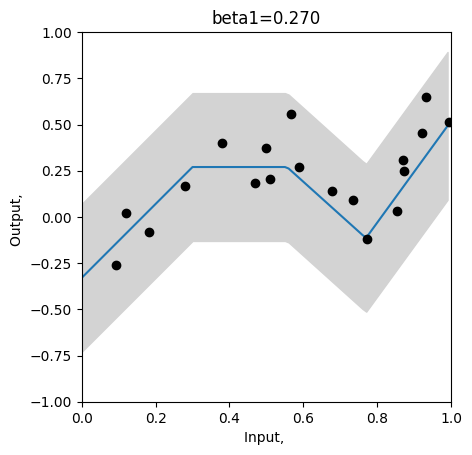

In [ ]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# and the least squares solutions
# Let's check that:
print("Maximum likelihood = %3.3f, at beta_1=%3.3f"%( (likelihoods[jnp.argmax(likelihoods)],beta_1_vals[jnp.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at beta_1=%3.3f"%( (nlls[jnp.argmin(nlls)],beta_1_vals[jnp.argmin(nlls)])))
print("Least squares = %3.3f, at beta_1=%3.3f"%( (sum_squares[jnp.argmin(sum_squares)],beta_1_vals[jnp.argmin(sum_squares)])))

# Plot the best model
beta_1=beta_1.at[0,0].set(beta_1_vals[jnp.argmin(sum_squares)])
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))


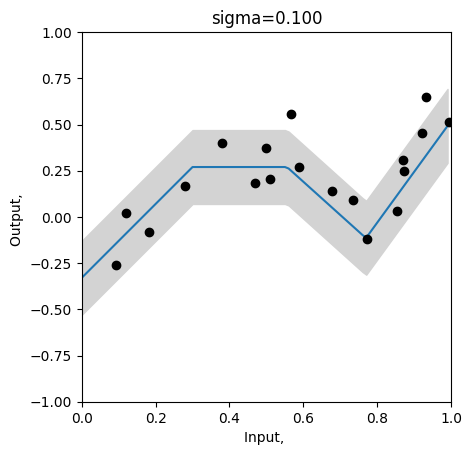

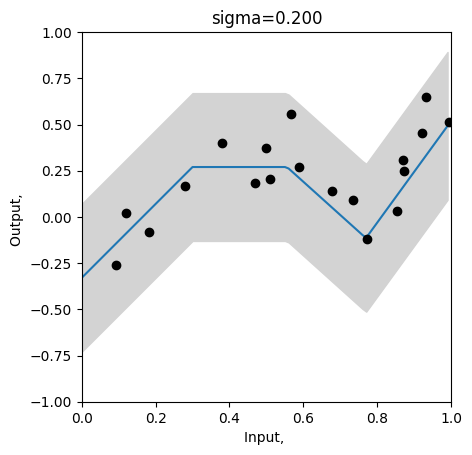

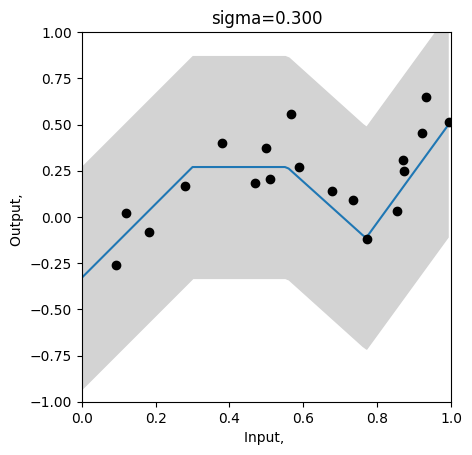

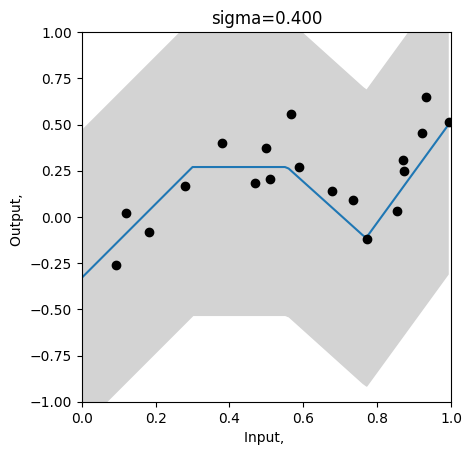

In [ ]:
# Define a range of values for the parameter
sigma_vals = jnp.arange(0.1,0.5,0.005)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = jnp.zeros_like(sigma_vals)
nlls = jnp.zeros_like(sigma_vals)
sum_squares = jnp.zeros_like(sigma_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Might as well set to the best offset
beta_1=beta_1.at[0,0].set(0.27)
for count in range(len(sigma_vals)):
  # Set the value for the parameter
  sigma = sigma_vals[count]
  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  # Compute and store the three values
  likelihoods=likelihoods.at[count].set(compute_likelihood(y_train, mu_pred, sigma))
  nlls=nlls.at[count].set(compute_negative_log_likelihood(y_train, mu_pred, sigma))
  sum_squares=sum_squares.at[count].set(compute_sum_of_squares(y_train, y_pred))
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model=sigma, title="sigma=%3.3f"%(sigma))


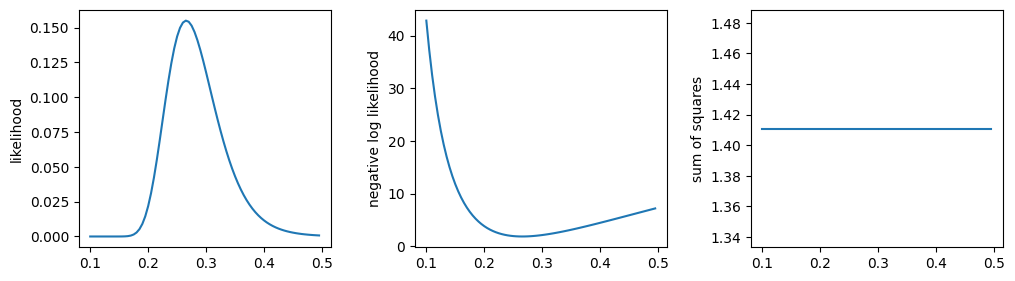

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10.5, 3.5)
fig.tight_layout(pad=3.0)
ax[0].plot(sigma_vals, likelihoods); ax[0].set_xlabel(''); ax[0].set_ylabel('likelihood')
ax[1].plot(sigma_vals, nlls); ax[1].set_xlabel(''); ax[1].set_ylabel('negative log likelihood')
ax[2].plot(sigma_vals, sum_squares); ax[2].set_xlabel(''); ax[2].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.155, at beta_1=0.265
Minimum negative log likelihood = 1.864, at beta_1=0.265


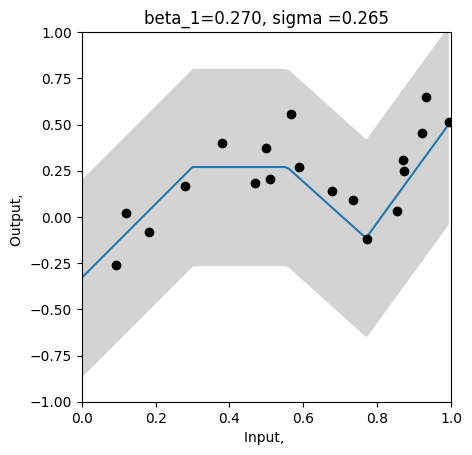

In [ ]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# The least squares solution does not depend on sigma, so it's just flat -- no use here.
# Let's check that:
print("Maximum likelihood = %3.3f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],sigma_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],sigma_vals[np.argmin(nlls)])))
# Plot the best model
sigma= sigma_vals[jnp.argmin(nlls)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta_1=%3.3f, sigma =%3.3f"%(beta_1[0,0],sigma))
